In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
url="/content/drive/MyDrive/EV_market_segmentation/Datasets/mega_cars.csv"
data = pd.read_csv(url)

In [67]:
data.head()

,Car,Style,BootSpace,Battery Capacity(kWh),Acceleration Time(sec),TopSpeed(km/h),Range(km),Max Power(kW),Max Torque(Nm),Charging T(h),Drive Type,Price(Lh)
0,Tata Nexon EV,Compact SUV,350 L,30.2,9.9,180,312,96,245,9,FWD,17
1,Tata Tigor EV,Subcompact Sedan,316 L,26.0,5.7,120,306,55,170,9,FWD,14
2,MG ZS EV,Compact SUV,448 L,44.5,8.5,120,340,174,353,8,FWD,25
3,Hyundai Kona Electric,Compact SUV,332 L,39.2,9.7,155,452,103,395,7,FWD,24
4,Jaguar I-Pace,Premium Midsize Sedan,656 L,90.0,4.8,200,470,294,696,13,AWD,112


In [68]:
for i in range(data.shape[0]):
    data.loc[i, 'BootSpace'] = data.loc[i, 'BootSpace'][:-2]

data.head()

,Car,Style,BootSpace,Battery Capacity(kWh),Acceleration Time(sec),TopSpeed(km/h),Range(km),Max Power(kW),Max Torque(Nm),Charging T(h),Drive Type,Price(Lh)
0,Tata Nexon EV,Compact SUV,350,30.2,9.9,180,312,96,245,9,FWD,17
1,Tata Tigor EV,Subcompact Sedan,316,26.0,5.7,120,306,55,170,9,FWD,14
2,MG ZS EV,Compact SUV,448,44.5,8.5,120,340,174,353,8,FWD,25
3,Hyundai Kona Electric,Compact SUV,332,39.2,9.7,155,452,103,395,7,FWD,24
4,Jaguar I-Pace,Premium Midsize Sedan,656,90.0,4.8,200,470,294,696,13,AWD,112


In [69]:
data['BootSpace'] = data['BootSpace'].astype('int')
data.columns

Index(['Car', 'Style', 'BootSpace', 'Battery Capacity(kWh)',
       'Acceleration Time(sec)', 'TopSpeed(km/h)', 'Range(km)',
       'Max Power(kW)', 'Max Torque(Nm)', 'Charging T(h)', 'Drive Type',
       'Price(Lh)'],
      dtype='object')

In [70]:
data['Style'].value_counts()

Compact SUV              6
Subcompact Sedan         1
Premium Midsize Sedan    1
Premium Coupe            1
Subcompact MPV           1
Premium Fullsize SUV     1
Premium Sports Sedan     1
Hatchback                1
Name: Style, dtype: int64

In [81]:
for i in range(data.shape[0]):
    if 'Hatchback' in data.loc[i, 'Style']:
        data.loc[i, 'Style'] = 0
    elif 'Subcompact' in data.loc[i, 'Style']:
        data.loc[i, 'Style'] = 1
    elif 'Compact' in data.loc[i, 'Style']:
        data.loc[i, 'Style'] = 2
    elif 'Premium' in data.loc[i, 'Style']:
        data.loc[i, 'Style'] = 3

In [71]:
data.iloc[:, 1:10].head()

,Style,BootSpace,Battery Capacity(kWh),Acceleration Time(sec),TopSpeed(km/h),Range(km),Max Power(kW),Max Torque(Nm),Charging T(h)
0,Compact SUV,350,30.2,9.9,180,312,96,245,9
1,Subcompact Sedan,316,26.0,5.7,120,306,55,170,9
2,Compact SUV,448,44.5,8.5,120,340,174,353,8
3,Compact SUV,332,39.2,9.7,155,452,103,395,7
4,Premium Midsize Sedan,656,90.0,4.8,200,470,294,696,13


<Axes: xlabel='Drive Type', ylabel='count'>

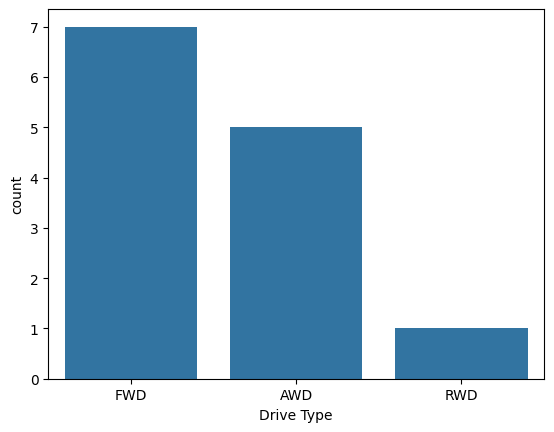

In [72]:
sns.countplot(x = data['Drive Type'])

In [73]:
dt_dummies = pd.get_dummies(data['Drive Type'], prefix = "DT")
data = pd.concat([data, dt_dummies], axis = 1)
data.head()

,Car,Style,BootSpace,Battery Capacity(kWh),Acceleration Time(sec),TopSpeed(km/h),Range(km),Max Power(kW),Max Torque(Nm),Charging T(h),Drive Type,Price(Lh),DT_AWD,DT_FWD,DT_RWD
0,Tata Nexon EV,Compact SUV,350,30.2,9.9,180,312,96,245,9,FWD,17,0,1,0
1,Tata Tigor EV,Subcompact Sedan,316,26.0,5.7,120,306,55,170,9,FWD,14,0,1,0
2,MG ZS EV,Compact SUV,448,44.5,8.5,120,340,174,353,8,FWD,25,0,1,0
3,Hyundai Kona Electric,Compact SUV,332,39.2,9.7,155,452,103,395,7,FWD,24,0,1,0
4,Jaguar I-Pace,Premium Midsize Sedan,656,90.0,4.8,200,470,294,696,13,AWD,112,1,0,0


In [74]:
data.drop(['Drive Type'], axis = 1, inplace = True)

In [75]:
corr = data.iloc[:, 3:10].corr()

<Axes: >

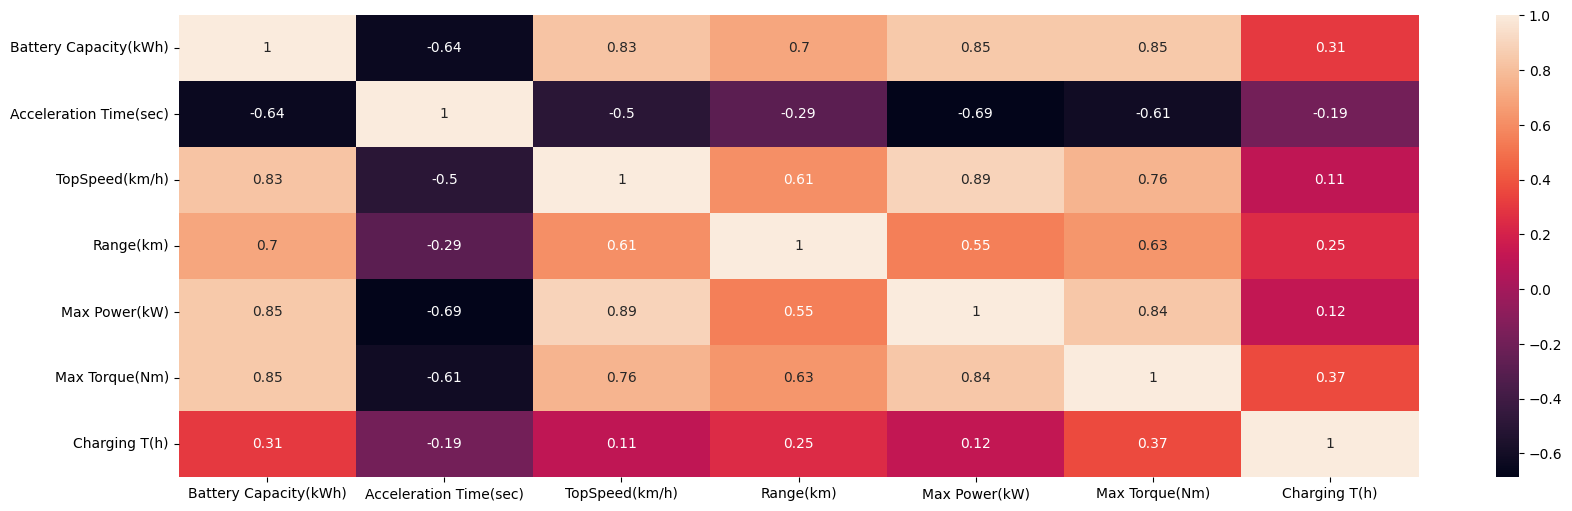

In [76]:
plt.figure(figsize=(20, 6))
sns.heatmap(corr, annot = True)

Text(0.5, 1.0, 'EV Cars Price Comparison')

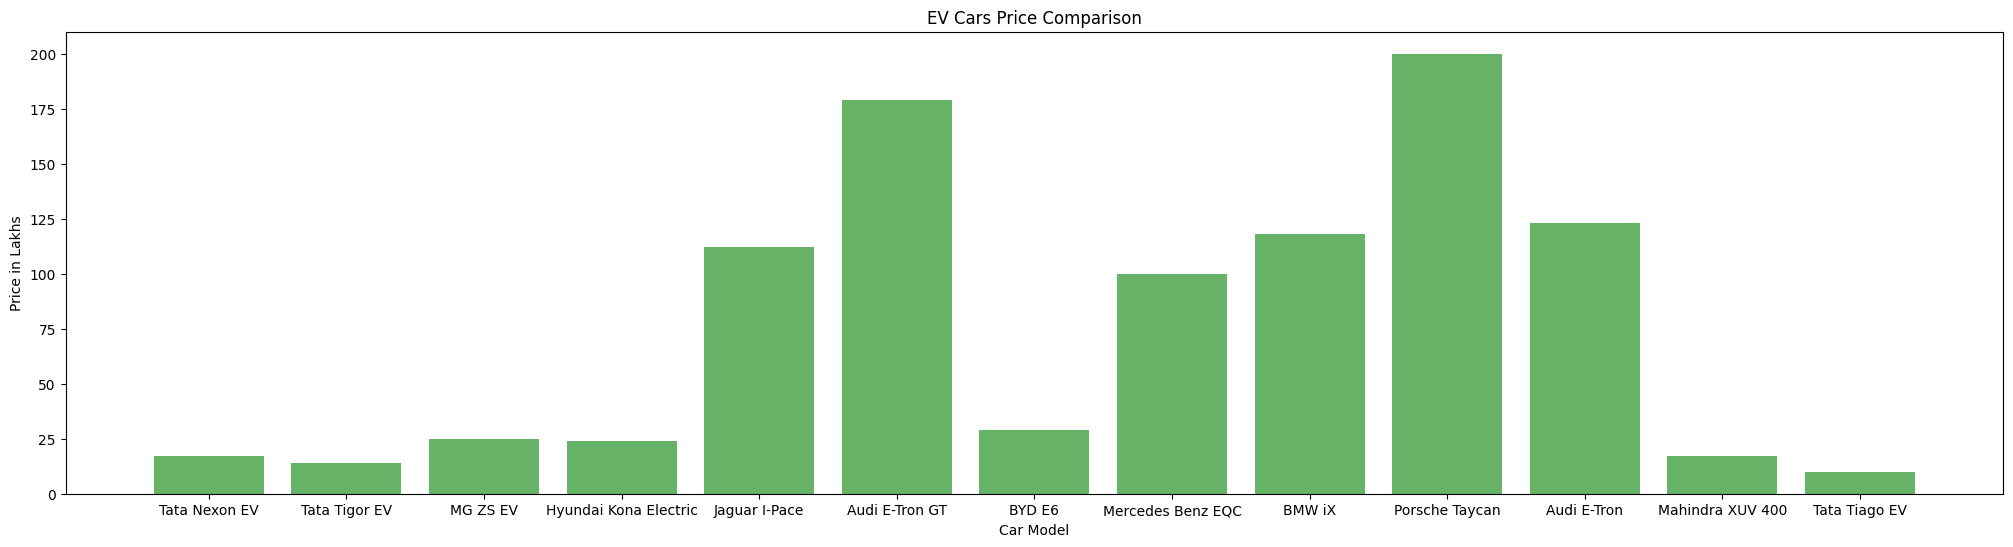

In [77]:
plt.figure(figsize=(25, 6))
plt.bar(data['Car'], data['Price(Lh)'], color = (0, 0.5, 0, 0.6))
plt.xlabel("Car Model")
plt.ylabel("Price in Lakhs")
plt.title("EV Cars Price Comparison")

In [80]:
style_price = pd.DataFrame(list(data['Style'].unique()), columns = ['Car Style'])

prices = []

for car_s in style_price['Car Style']:
    prices.append(data[ data['Style'] == car_s ]['Price(Lh)'].mean())

style_price['Price(L)'] = pd.Series(prices)

data.head()

,Car,Style,BootSpace,Battery Capacity(kWh),Acceleration Time(sec),TopSpeed(km/h),Range(km),Max Power(kW),Max Torque(Nm),Charging T(h),Price(Lh),DT_AWD,DT_FWD,DT_RWD
0,Tata Nexon EV,Compact SUV,350,30.2,9.9,180,312,96,245,9,17,0,1,0
1,Tata Tigor EV,Subcompact Sedan,316,26.0,5.7,120,306,55,170,9,14,0,1,0
2,MG ZS EV,Compact SUV,448,44.5,8.5,120,340,174,353,8,25,0,1,0
3,Hyundai Kona Electric,Compact SUV,332,39.2,9.7,155,452,103,395,7,24,0,1,0
4,Jaguar I-Pace,Premium Midsize Sedan,656,90.0,4.8,200,470,294,696,13,112,1,0,0


In [78]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [82]:
x = data.iloc[:, 1:].values

sc = StandardScaler()
x = sc.fit_transform(x)

pca = PCA()
pca.fit(x)

PCA()

In [83]:
pca.explained_variance_ratio_

array([6.25423018e-01, 1.35577558e-01, 7.23642495e-02, 6.54117017e-02,
       4.19777340e-02, 3.09025079e-02, 1.28398302e-02, 8.99556141e-03,
       5.78913757e-03, 6.20176182e-04, 9.55070923e-05, 3.01844928e-06,
       1.49404331e-34])

Text(0, 0.5, 'Cumulative Explained Variance')

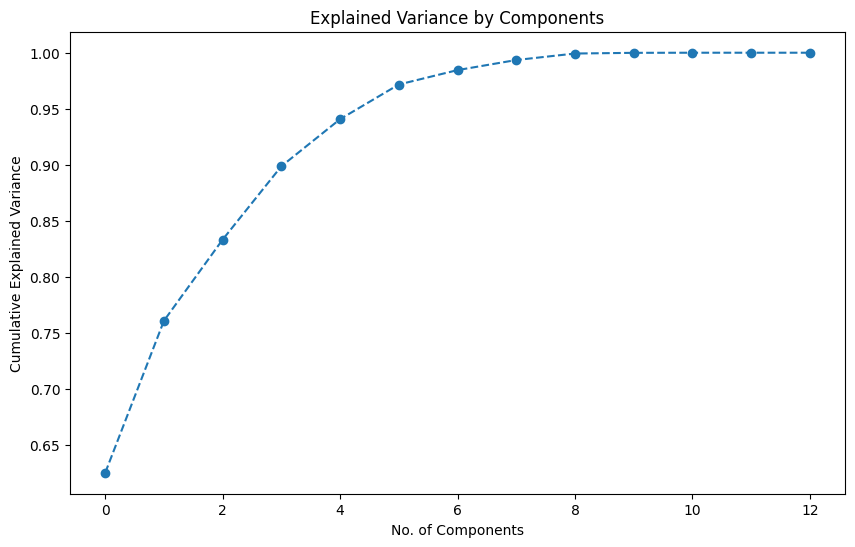

In [84]:
plt.figure(figsize = (10, 6))
plt.plot(range(data.shape[1] - 1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('No. of Components')
plt.ylabel('Cumulative Explained Variance')

In [88]:
pca = PCA(n_components = 3)
pca.fit(x)

PCA(n_components=3)

In [89]:

pca_scores = pca.transform(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


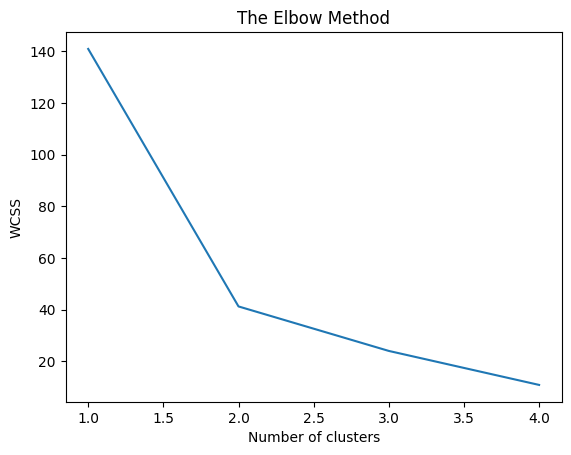

In [90]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pca_scores)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 5), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [91]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(pca_scores)

kmeans2 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans2.fit(pca_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

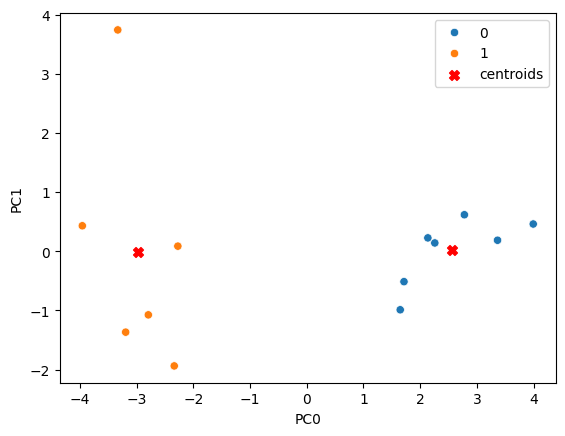

In [93]:
from collections import Counter
Counter(kmeans.labels_)

p_df = pd.DataFrame(data = pca_scores, columns = ['PC' + str(i) for i in range(0, 3) ])

sns.scatterplot(data = p_df, x = "PC0", y = "PC1", hue = kmeans.labels_)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker = "X", c = "r", s = 50, label = "centroids")
plt.legend()
plt.show()

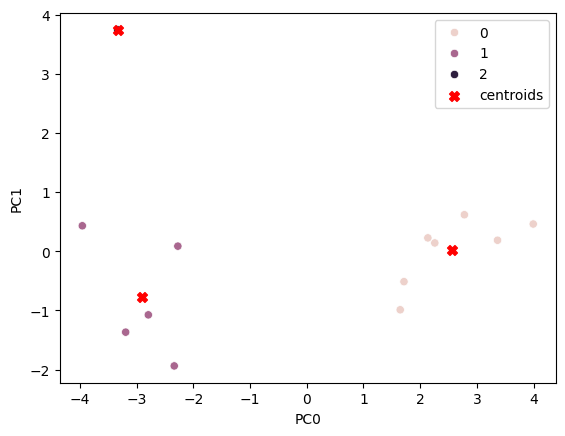

In [94]:
from collections import Counter
Counter(kmeans2.labels_)

p_df = pd.DataFrame(data = pca_scores, columns = ['PC' + str(i) for i in range(0, 3) ])

sns.scatterplot(data = p_df, x = "PC0", y = "PC1", hue = kmeans2.labels_)

plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1],
            marker = "X", c = "r", s = 50, label = "centroids")
plt.legend()
plt.show()

In [61]:
data['Cluster'] = kmeans2.labels_
data.head()

,Car,Style,BootSpace,Battery Capacity(kWh),Acceleration Time(sec),TopSpeed(km/h),Range(km),Max Power(kW),Max Torque(Nm),Charging T(h),Price(Lh),DT_AWD,DT_FWD,DT_RWD,Cluster
0,Tata Nexon EV,Compact SUV,350,30.2,9.9,180,312,96,245,9,17,0,1,0,0
1,Tata Tigor EV,Subcompact Sedan,316,26.0,5.7,120,306,55,170,9,14,0,1,0,0
2,MG ZS EV,Compact SUV,448,44.5,8.5,120,340,174,353,8,25,0,1,0,0
3,Hyundai Kona Electric,Compact SUV,332,39.2,9.7,155,452,103,395,7,24,0,1,0,0
4,Jaguar I-Pace,Premium Midsize Sedan,656,90.0,4.8,200,470,294,696,13,112,1,0,0,1
